In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
carrefour = pd.read_csv("Carrefour.csv")
df=pd.DataFrame(carrefour)

In [ ]:
df.head(2)

,nombre,Precios,Precios_unit,categorias,subcategoria,Categoria_principal,Unidad de referencia
0,Merluza en filete 1 kg aprox,17.50,17.50,productos frescos,pescaderia,Marisco y pescado,€/kg
1,Parches térmicos terapéuticos para dolor de cu...,17.49,2.91,parafarmacia,botiquin,botiquin,€/ud


In [ ]:
df.describe()

,Precios,Precios_unit
count,13257.000000,1.325700e+04
mean,4.382691,1.360347e+02
std,3.398889,1.235028e+04
min,0.210000,0.000000e+00
25%,2.060000,2.610000e+00
50%,3.250000,7.390000e+00
75%,5.390000,1.524000e+01
max,17.500000,1.419100e+06


In [ ]:
df.dtypes

nombre                   object
Precios                 float64
Precios_unit            float64
categorias               object
subcategoria             object
Categoria_principal      object
Unidad de referencia     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13257 entries, 0 to 13256
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nombre                13257 non-null  object 
 1   Precios               13257 non-null  float64
 2   Precios_unit          13257 non-null  float64
 3   categorias            13257 non-null  object 
 4   subcategoria          13257 non-null  object 
 5   Categoria_principal   13257 non-null  object 
 6   Unidad de referencia  13257 non-null  object 
dtypes: float64(2), object(5)
memory usage: 725.1+ KB


In [ ]:
print(f'------- Dimensiones:\n{df.shape}')

print(f'------- Tipo de datos:\n{df.dtypes}')

print(f'------- Nulos por columna:\n{df.isna().sum()}')
# print(f'------- Nulos por columna:\n{df.isna().sum(axis = 0)}') # nulos por columna
# print(f'------- Nulos por filas:\n{df.isna().sum(axis = 1)}') # nulos por registro

print(f'------- Nulos totales:\n{df.isna().sum().sum()}')

------- Dimensiones:
(13257, 7)
------- Tipo de datos:
nombre                   object
Precios                 float64
Precios_unit            float64
categorias               object
subcategoria             object
Categoria_principal      object
Unidad de referencia     object
dtype: object
------- Nulos por columna:
nombre                  0
Precios                 0
Precios_unit            0
categorias              0
subcategoria            0
Categoria_principal     0
Unidad de referencia    0
dtype: int64
------- Nulos totales:
0


In [ ]:
print('Número de filas:',df.shape[0], ',número de columnas :',df.shape[1])

Número de filas: 13257 ,número de columnas : 7


In [ ]:
df.columns

Index(['nombre', 'Precios', 'Precios_unit', 'categorias', 'subcategoria',
       'Categoria_principal', 'Unidad de referencia'],
      dtype='object')

CATEGORIAS

In [ ]:
categorias_unicas = df['categorias'].unique()
print(categorias_unicas)

['productos frescos' 'parafarmacia' 'bebidas' 'perfumeria e higiene'
 'limpieza y hogar' 'bebe' 'la despensa' 'mascotas' 'congelados']


NUMERO DE PRODUCTOS POR CATEGORIA

In [ ]:
producto_categoria = df.value_counts("categorias")

In [ ]:
producto_categoria

categorias
la despensa             5591
productos frescos       2008
perfumeria e higiene    1897
limpieza y hogar        1182
bebidas                  926
parafarmacia             533
bebe                     435
congelados               432
mascotas                 253
Name: count, dtype: int64

In [ ]:
producto_categoria = df.groupby("categorias").agg({"nombre" : 'count'})

In [ ]:
producto_categoria

,nombre
categorias,
bebe,435
bebidas,926
congelados,432
la despensa,5591
limpieza y hogar,1182
mascotas,253
parafarmacia,533
perfumeria e higiene,1897
productos frescos,2008


<ipython-input-45-4748d82e152f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='categorias', y= 'nombre', data=producto_categoria, palette= 'mako')


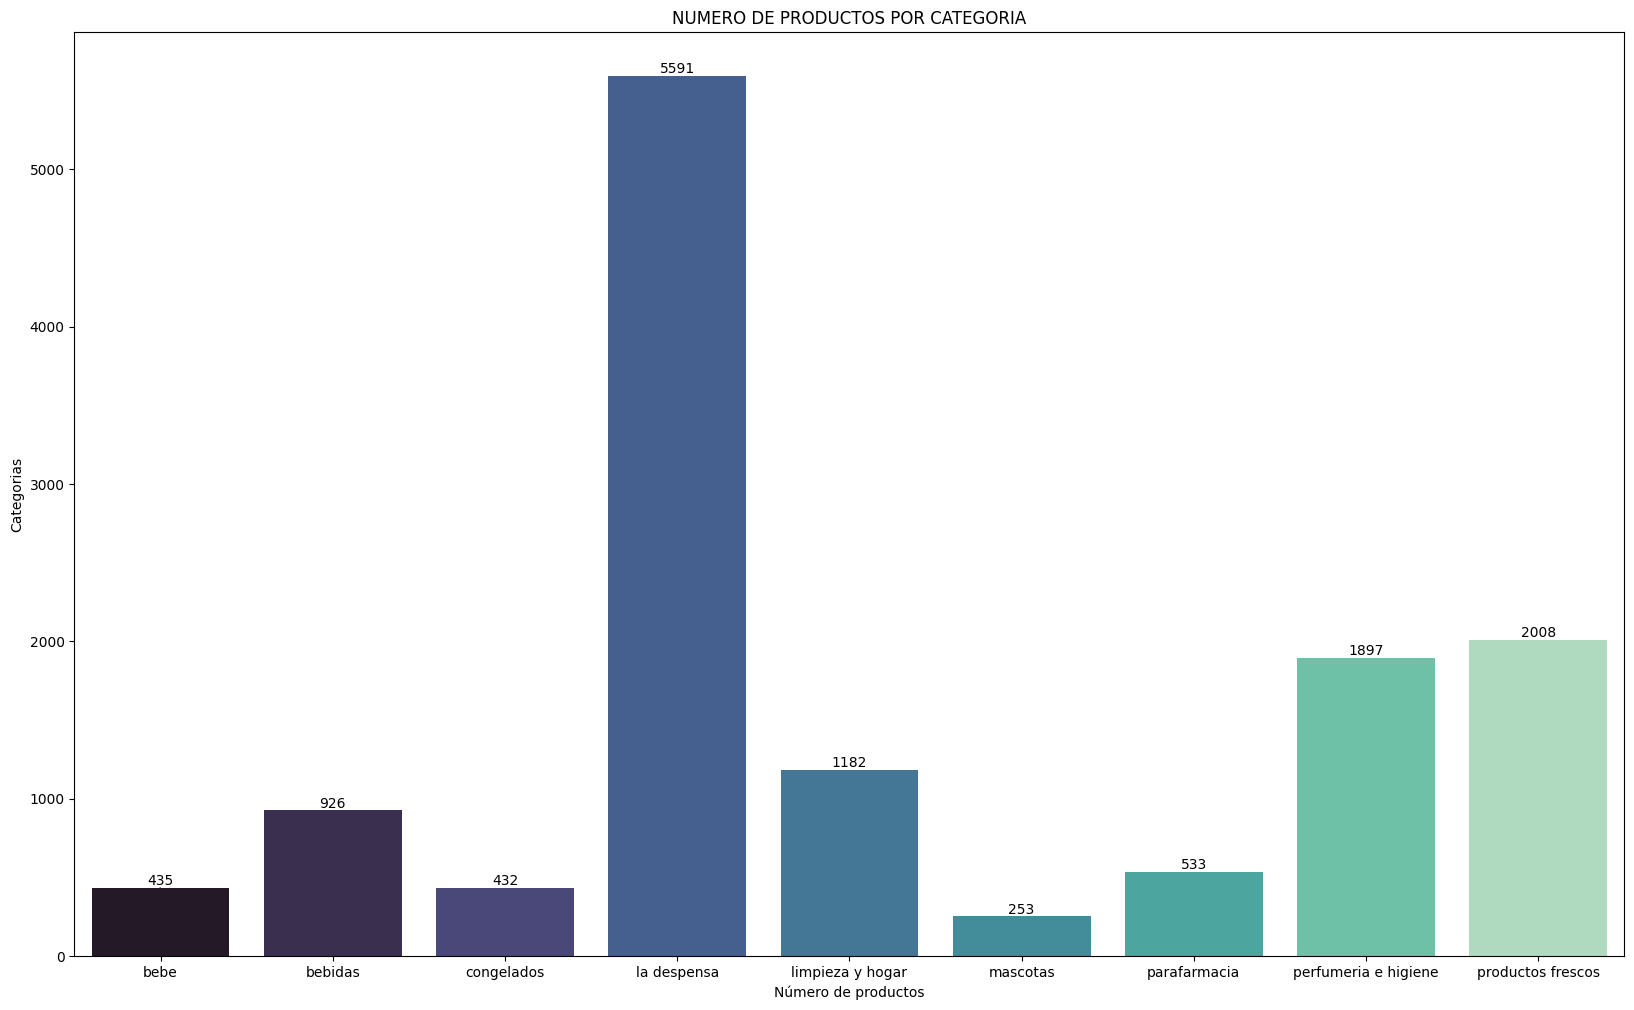

In [ ]:
plt.figure(figsize=(20,12))
plt.ylabel('Categorias')
plt.xlabel('Número de productos')
plt.title('NUMERO DE PRODUCTOS POR CATEGORIA')

ax = sns.barplot(x='categorias', y= 'nombre', data=producto_categoria, palette= 'mako')
ax.bar_label(ax.containers[0], fontsize=1);
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

BOXPLOT POR CATEGORÍA

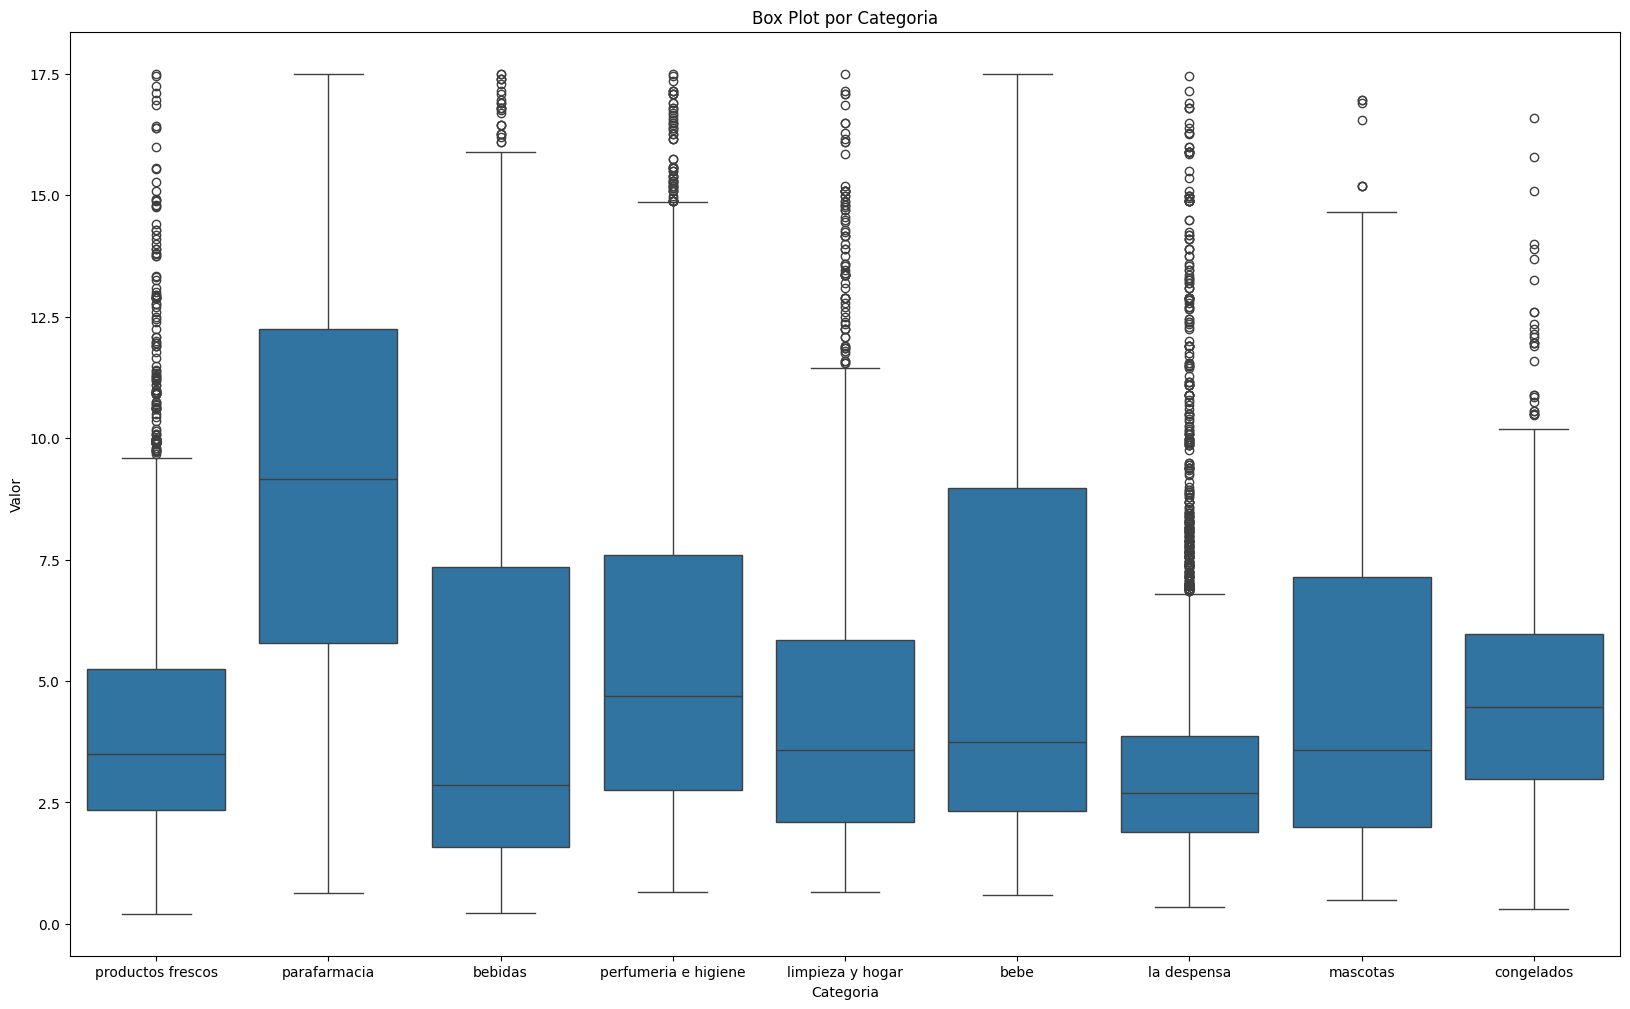

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='categorias', y='Precios', data=df)
plt.title('Box Plot por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor')
plt.show()

PRODCUTO MÁXIMO Y MINIMO POR CATEGORÍA

In [ ]:
precios_min_max = df.groupby("categorias")['Precios'].agg({"min","max"}).reset_index()

In [ ]:
precios_min_max.head(2)

,categorias,min,max
0,bebe,0.60,17.49
1,bebidas,0.22,17.49


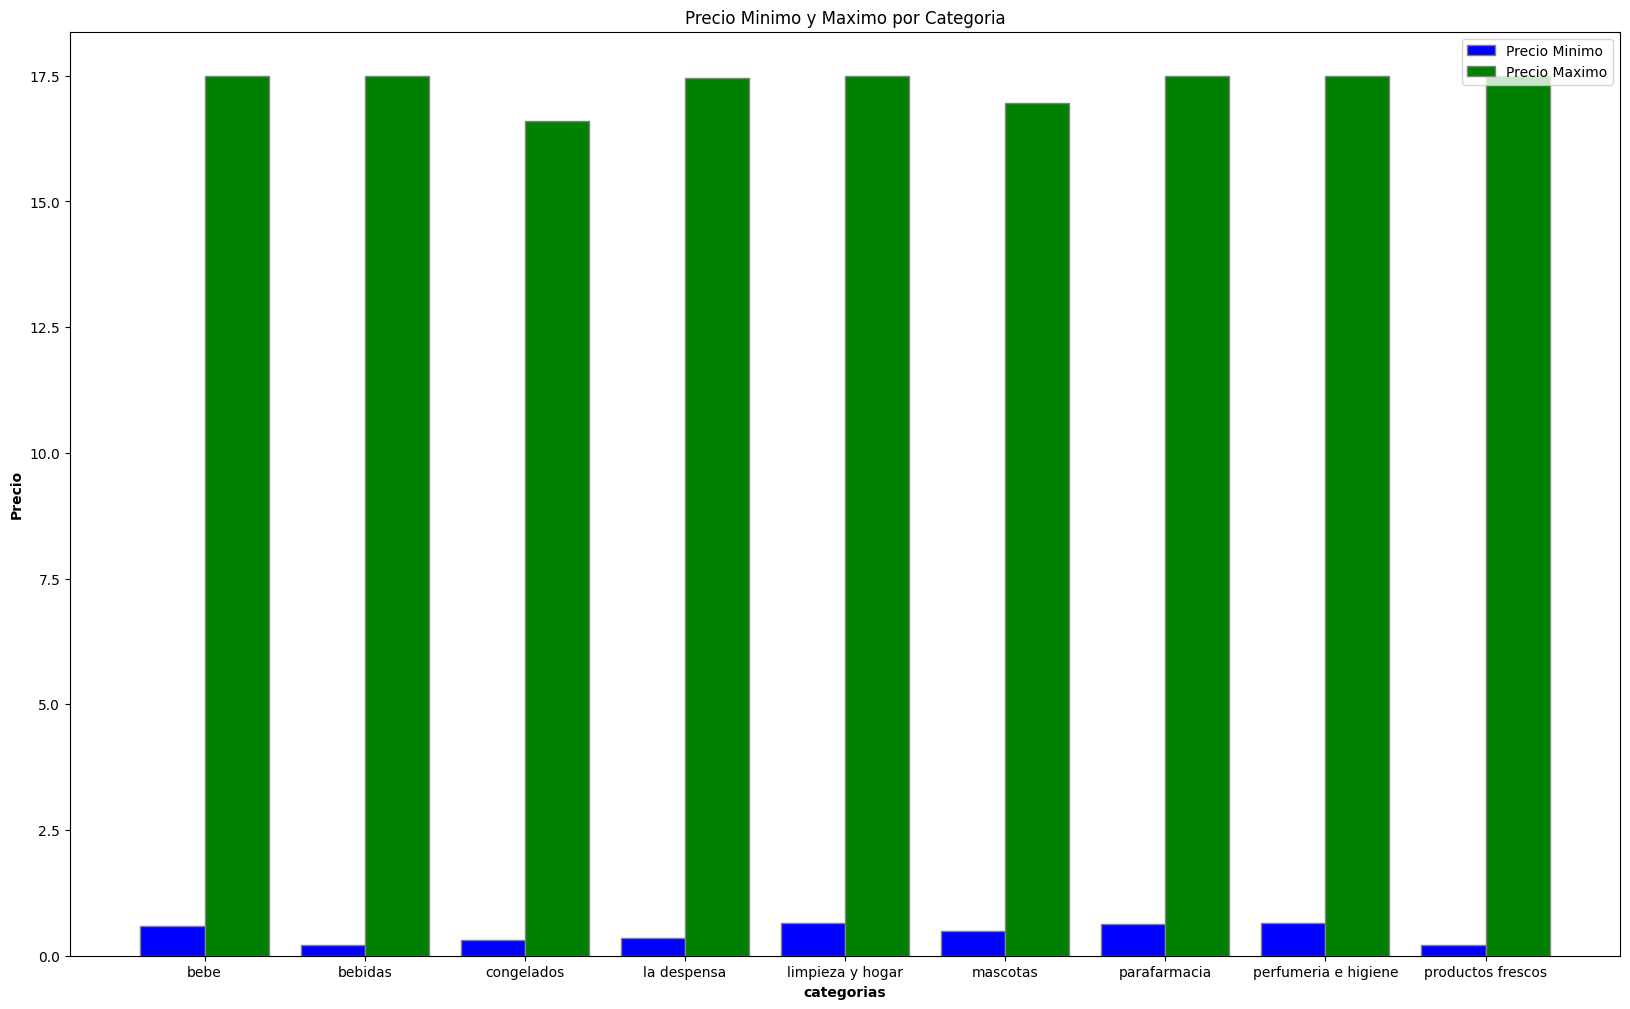

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
r1 = range(len(precios_min_max))
bar_width = 0.4
r2 = [x + bar_width for x in r1]
# Crear las barras
ax.bar(r1, precios_min_max['min'], color='blue', width=bar_width, edgecolor='grey', label='Precio Minimo')
ax.bar(r2, precios_min_max['max'], color='green', width=bar_width, edgecolor='grey', label='Precio Maximo')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('categorias', fontweight='bold')
ax.set_ylabel('Precio', fontweight='bold')
ax.set_title('Precio Minimo y Maximo por Categoria')
ax.set_xticks([r + bar_width / 2 for r in range(len(precios_min_max))])
ax.set_xticklabels(precios_min_max['categorias'])

plt.legend()
plt.show()